### Movie rating
#### Dataset - https://grouplens.org/datasets/movielens/100k/

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	
	* Each user has rated at least 20 movies. 
    
	* Simple demographic info for the users (age, gender, occupation, zip)

In [1]:
import pandas as pd
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# loading data and checking the shape of data

rating = pd.read_csv("ml-100k/u.data",sep = '\t',names= ['UseID', 'ItemID', 'rating', 'Timestamp' ])
print(rating.shape)
rating.head()

(100000, 4)


,UseID,ItemID,rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   UseID      100000 non-null  int64
 1   ItemID     100000 non-null  int64
 2   rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
# checking missing value
rating.isna().apply(pd.value_counts)

,UseID,ItemID,rating,Timestamp
False,100000,100000,100000,100000


In [5]:
# Movie details
## fetching from ml-100k/u.item
col = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
movies = pd.read_csv("ml-100k/u.item",sep = '|',encoding = 'latin-1',names=col)
print(movies.shape)
movies.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Dropping irrelevant columns
movies.drop(columns= ['video release date'], inplace=True)

In [7]:
movies.head()

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# generes of movies
l = []
for i in movies.loc[:,'unknown' : 'Western'].columns:
    b = movies[i].value_counts()[1]
    l.append(b)
print(l)
print(movies.loc[:,'unknown' : 'Western'].columns)

[2, 251, 135, 42, 122, 505, 109, 50, 725, 22, 24, 92, 56, 61, 247, 101, 251, 71, 27]
Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [9]:
# checking unknown cateogry [only 2 entries are there]
movies[movies['unknown']==1]

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# checking for details of unknown with movieid, if not much info then we can remove 
rating[rating.ItemID == 1373]
#rating[rating.ItemID == 267]

,UseID,ItemID,rating,Timestamp
8567,181,1373,1,878962052


In [11]:
# only 1 review, we can remove the unknown column
movies.drop(movies[movies['unknown'] == 1].index, axis=0, inplace=True)
movies.drop(columns= 'unknown',inplace=True)

In [12]:
movies.shape

(1680, 22)

In [13]:
# checking for any missing value
movies.isna().apply(pd.value_counts)

,movie id,movie title,release date,IMDb URL,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1680.0,1680.0,1680.0,1678,1680.0,1680.0,1680.0,1680.0,1680.0,1680.0,...,1680.0,1680.0,1680.0,1680.0,1680.0,1680.0,1680.0,1680.0,1680.0,1680.0
True,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No missing values found, except for imdb url this column can be removed as this is not much useful

In [14]:
# removing imdb URL column
movies.drop(movies[movies['IMDb URL'] == 1].index, axis=0, inplace=True)
movies.drop(columns= 'IMDb URL',inplace=True)

In [15]:
# checking for any missing value
movies.isna().apply(pd.value_counts)

,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,...,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680


In [16]:
# User data fetching from ml-100k/u.user
users = pd.read_csv('ml-100k/u.user',sep = '|', names= ['UserID',  'Age', 'Gender', 'Occupation','Zip-code'])
print(users.shape)
users.head()

(943, 5)


,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [17]:
# checking for any missing value
users.isna().apply(pd.value_counts)

,UserID,Age,Gender,Occupation,Zip-code
False,943,943,943,943,943


no missing value found

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Children's    1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

# Plotting

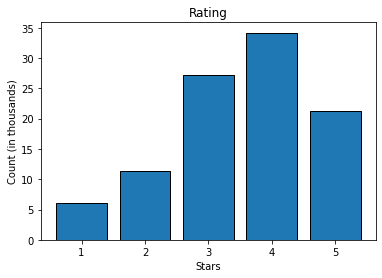

In [19]:
# plot for checking distribution of rating
x = rating.rating.value_counts().index
y = [rating['rating'].value_counts()[i]/1000 for i in x]   #count(in thousands) on y-axis 


plt.bar(x,y, align='center',edgecolor = 'black')  #plotting a bar chart
plt.xlabel('Stars')
plt.ylabel('Count (in thousands)')
plt.title('Rating')

plt.show()

C:\Users\shashikant singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


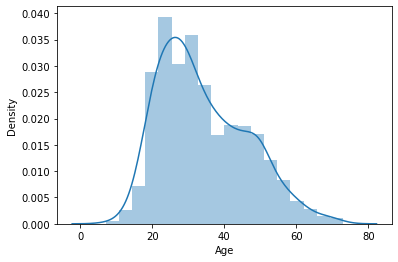

In [20]:
# user's age
sns.distplot(users.Age)
plt.show()

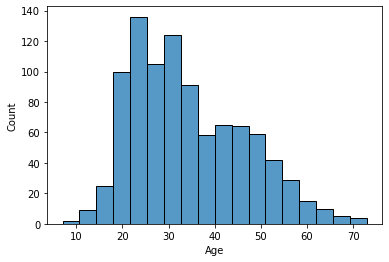

In [21]:
# user's age
sns.histplot(users.Age)
plt.show()

C:\Users\shashikant singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


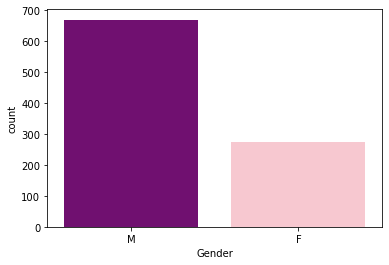

In [22]:
# Gender distribution
sns.countplot(users.Gender,palette=['purple','pink'])
plt.show()

C:\Users\shashikant singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


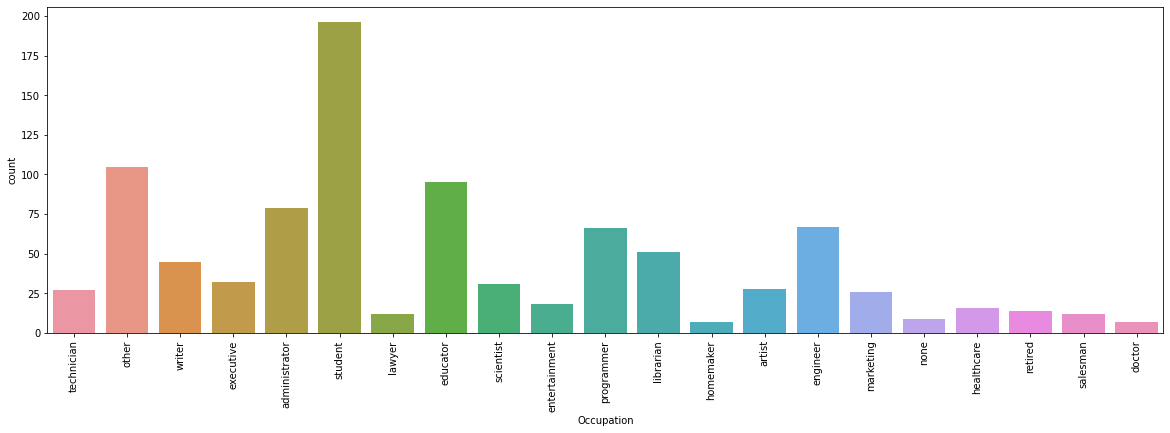

In [23]:
# Distribution on occupation
plt.figure(figsize=(20,6))
sns.countplot(users.Occupation)
#plt.yticks(rotation=0)
plt.xticks(rotation=90) #[marks the label vertically instead of horizontal]
plt.show()


In [24]:
# Popularity of generes over the year
movies['release_year'] = movies['release date'].str.split('-', expand = True)[2]  #seperating out the year from the date
movies['release_year'] = movies.release_year.astype(int)  # changing the type to int

genre_by_year = movies.groupby('release_year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

release_year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


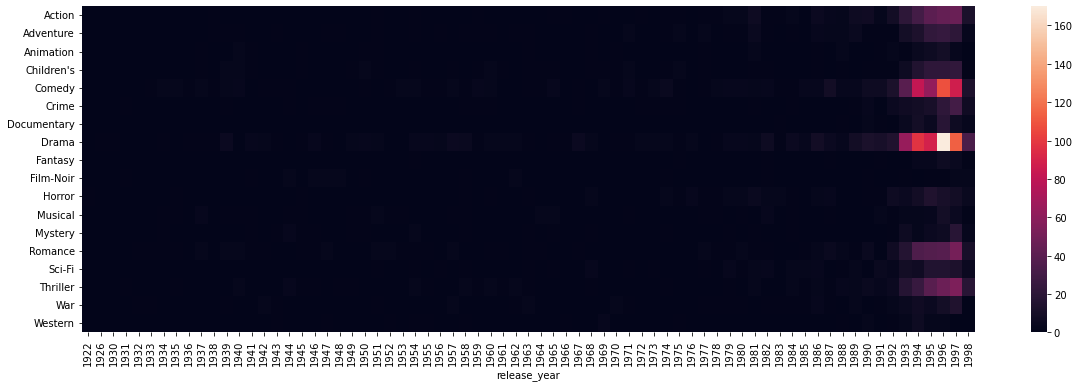

In [25]:
# plotting heatmap for above table
plt.figure(figsize=(20,6))
sns.heatmap(genre_by_year)
plt.show()

In [26]:
# finding top 25movies with atleast 100 rating
items = rating.groupby('ItemID').count()
items = items[rating.groupby('ItemID').count().UseID > 100].index
items = rating.loc[rating.ItemID.isin(items)]

items = items.groupby('ItemID').mean()

items = items.sort_values('rating',ascending = False)

order = items.index



In [27]:
rating_list = items.rating[0:25]
items = movies.loc[movies['movie id'].isin(order)]
top_25_movies = items.set_index('movie id').loc[order]



In [28]:
items = movies.loc[movies['movie id'].isin(order)]
top_25_movies = items.set_index('movie id').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]
top_25_movies = top_25_movies.reset_index()
top_25_movies['avg_rating'] =  rating_list.values
top_25_movies

,ItemID,movie title,avg_rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


### Gender distribution across the genres

In [29]:
# checking column name for finding a column to perform join [here UserID from users and movie id from movies]

movies.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [30]:
users.columns

Index(['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code'], dtype='object')

In [31]:
users.head()

,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [32]:
rating.columns

Index(['UseID', 'ItemID', 'rating', 'Timestamp'], dtype='object')

In [33]:
rating.head()

,UseID,ItemID,rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [34]:
#renaming UseID from rating to UserID to perform inner join with users
rating.rename(columns={'UseID' : 'UserID'}, inplace=True)

In [35]:
result = pd.merge(rating, users, how='inner', on='UserID')

In [36]:
result.head()

,UserID,ItemID,rating,Timestamp,Age,Gender,Occupation,Zip-code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


In [37]:
# renaming movie id from movies to ItemID
movies.rename(columns={'movie id' : 'ItemID'}, inplace = True)

In [38]:
result = pd.merge(result, movies, how='inner', on='ItemID')

In [39]:
result.head()

,UserID,ItemID,rating,Timestamp,Age,Gender,Occupation,Zip-code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997


In [42]:
genre_byGender = result.groupby('Gender').sum().loc[:,'Action':'Western']

In [43]:
genre_byGender['total'] = genre_byGender.sum(axis = 1)
genre_byGender

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [44]:
# finding in % ,  dividing each cell with row total and multiplying by 100
genre_byGender.div(genre_byGender.total, axis= 0) * 100 

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


## Result - 
###### Drama genre is most watched among both Male and Female. 